In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# tf.disable_v2_behavior() # Using Tensorflow 1 for this tutorial
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

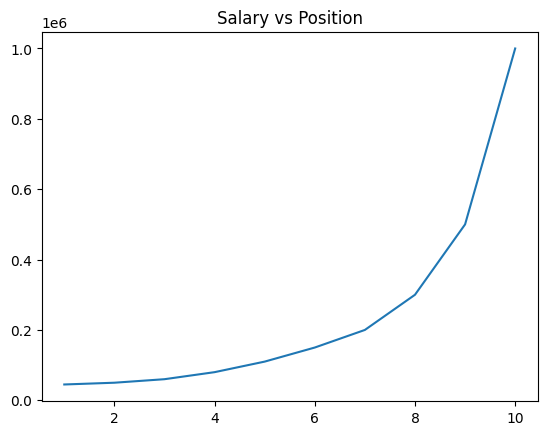

In [4]:
PATH = 'Position_Salaries.csv'

data = pd.read_csv(PATH)

def load_data(): 
  data = pd.read_csv(PATH) 
  m = len(data) 
  x = np.array(data[data.columns[1]]).reshape((m, 1)) 
  y = np.array(data[data.columns[2]]).reshape((m, 1)) 
  return [x, y, m]

x, y, m = load_data()

plt.plot(x, y)
plt.title("Salary vs Position")
plt.show()

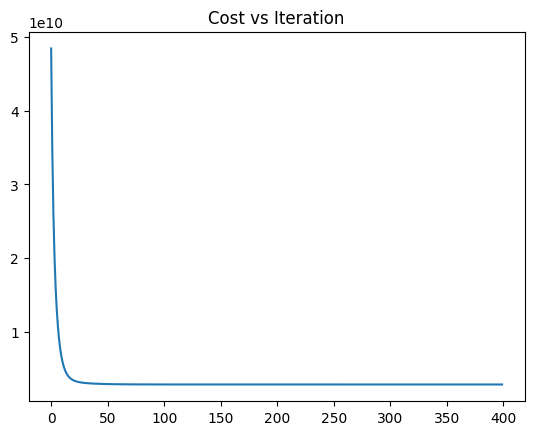

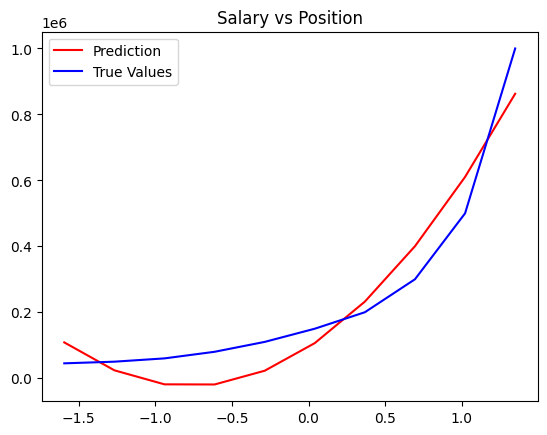

R2 Correlation:  0.9101914235885681


In [10]:
tf.compat.v1.disable_eager_execution()
alpha = 0.15
epochs = 400
m = len(x)
errors = []

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

X = tf.compat.v1.placeholder(tf.float32, shape=[None, 1], name='x-input')
Y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1], name='y-input')

theta_1 = tf.Variable(tf.zeros([1, 1]))
theta_2 = tf.Variable(tf.zeros([1, 1]))
theta_3 = tf.Variable(tf.zeros([1, 1]))

model = tf.matmul(tf.pow(X, 2), theta_1) + tf.matmul(X, theta_2) + theta_3

cost = tf.reduce_sum(tf.square(Y-model))/(2*m)

optimizer = tf.compat.v1.train.GradientDescentOptimizer(alpha).minimize(cost)

init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    sess.run(optimizer, feed_dict={X:x_train, Y:y_train})
    loss = sess.run(cost, feed_dict={X:x_train, Y:y_train})
    errors.append(loss)
  theta1, theta2, theta3 = sess.run([theta_1, theta_2, theta_3])

plt.plot(list(range(epochs)), errors)
plt.title("Cost vs Iteration")
plt.show()

x = scaler.transform(x)
pred = theta1 * x**2 + theta2 * x + theta3

plt.plot(x, pred, 'red', label="Prediction")
plt.plot(x, y, 'blue', label="True Values")
plt.legend()
plt.title("Salary vs Position")
plt.show()

print("R2 Correlation: ", r2(y, pred))